<a href="https://colab.research.google.com/github/Bbuyukyilmaz/ELE492---Image-Processing-Homeworks/blob/main/MT1/Q2/MT1_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Bbuyukyilmaz/ELE492---Image-Processing-Homeworks.git

Cloning into 'ELE492---Image-Processing-Homeworks'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 135 (delta 57), reused 124 (delta 55), pack-reused 3
Receiving objects: 100% (135/135), 4.60 MiB | 9.70 MiB/s, done.
Resolving deltas: 100% (57/57), done.


44


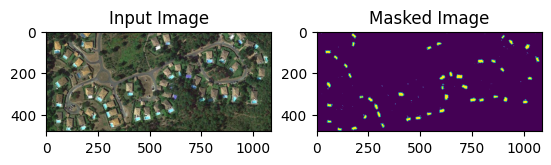

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# read image in BGR
img = cv2.imread('/content/ELE492---Image-Processing-Homeworks/MT1/q3_image.png')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


## convert to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# define blue color range
lower_range = np.array([75, 50, 70])
upper_range = np.array([140, 255, 255])

# perform mask
mask = cv2.inRange(hsv, lower_range, upper_range)

# define white color range
sensitivity = 15
lower_white = np.array([0,0,255-sensitivity])
upper_white = np.array([255,sensitivity,255])

# perform mask and add to blue mask
mask += cv2.inRange(hsv, lower_white, upper_white)


ret, thresh = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

# obtain the connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh)

# set a minimum component size (in pixels)
min_size = 50

# count the number of objects
num_objects = 0
for i in range(1, num_labels):
    area = stats[i, cv2.CC_STAT_AREA]
    if area >= min_size:
        num_objects += 1

# print number of objects       
print(num_objects)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(rgb_img)
ax[0].set_title("Input Image")
ax[1].imshow(mask)
ax[1].set_title("Masked Image")
plt.show()
